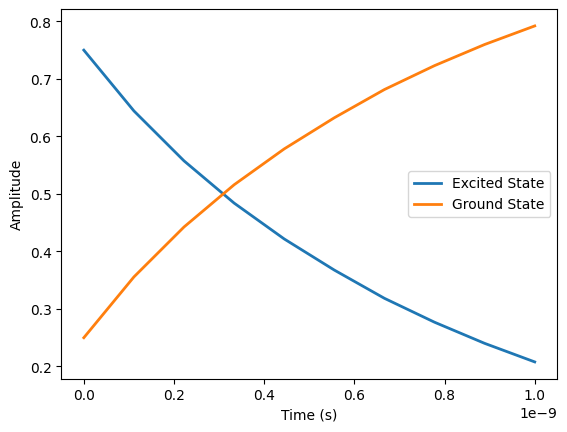

In [ ]:
import numpy as np
from qmad.solver import solve_avq_vect
from qmad.effh import VectorizedEffectiveHamiltonian
from qmad.ansatzVect import Ansatz
import matplotlib.pyplot as plt
# Execution Code for Amplitude damping channel example
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sp = (sx + 1j * sy) / 2
Id = np.eye(2, dtype=np.complex128)

tf = 1000e-12
dt = 1000e-13
gamma = 1.52e9
H = np.eye(2, dtype=np.complex128)
lind = sp
H = VectorizedEffectiveHamiltonian(H, gamma, lind)
u0 = np.array([1 / 2, np.sqrt(3)/2], dtype=np.complex128) #it should be normalized initial state with 2^n length

# u0 = np.array([0, 1], dtype=np.complex128)
ansatz = Ansatz(u0, relrcut=1e-6)
res = solve_avq_vect(H, ansatz, [0, tf], dt)


excited = [res.u[i][1, 1].real for i in range(10)]
ground = [res.u[i][0, 0].real for i in range(10)]
times = np.linspace(0, 1000e-12, 10)

plt.plot(times, excited, label="Excited State", linewidth=2)
plt.plot(times, ground, label="Ground State", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [2]:
from qutip import mesolve, Qobj
import numpy as np
import matplotlib.pyplot as plt
def qutip_prop(H, rho0, time_arr, c_ops, observable):
    """
    First import the mesolve function, which is used to solve master equations, and the Qobj class, which is used to represent quantum objects, from the QuTiP library.
    - H: Hamiltonian of the system (Qobj).
    - rho0: Initial density matrix (Qobj).
    - time_arr: Time array for dynamic simulation (array).
    - c_ops: List of collapse operators (list of Qobj), can be empty for Liouville equation.
    - observable: Operator for which the expectation value is to be calculated (Qobj).
    Returns:
    - expec_vals: List of expectation values of the observable over time.
    """
    result = mesolve(H, rho0, time_arr, c_ops, observable)
    return result.expect

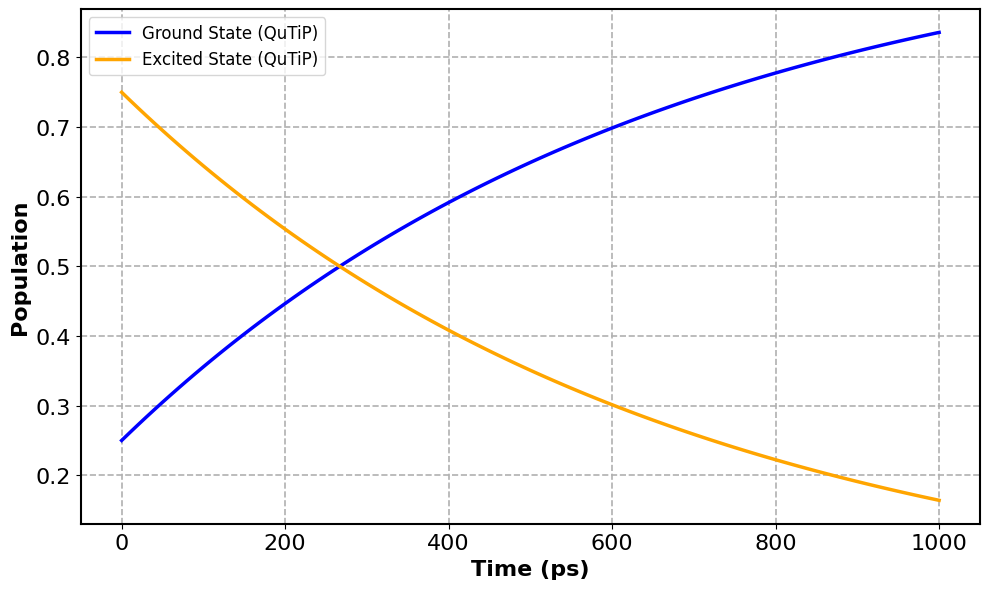

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Pauli matrices and lowering operator
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sp = (sx + 1j * sy) / 2
sm = Qobj(sp)  # collapse operator for amplitude damping

# Identity Hamiltonian (trivial in this case)
H = Qobj(np.eye(2, dtype=np.complex128))

# Time scale
tf = 1000e-12  # final time
dt = 1000e-14  # time step
times = np.arange(0, tf, dt)  # time array

# Amplitude damping rate
gamma = 1.52e9  # damping rate

# Initial state (normalize if necessary)
u0 = np.array([1 / 2, np.sqrt(3) / 2], dtype=np.complex128)
u0 = u0 / np.linalg.norm(u0)  # normalize the state
psi0 = Qobj(u0)  # initial state as Qobj
rho0 = psi0 * psi0.dag()  
# Collapse operators
c_ops = [np.sqrt(gamma) * sm]  # amplitude damping

# Define projectors for ground and excited states
proj_excited = basis(2, 1) * basis(2, 1).dag()  # |1><1|
proj_ground = basis(2, 0) * basis(2, 0).dag()   # |0><0|

# Solve the master equation using mesolve
result = qutip_prop(H, rho0, times, c_ops, [proj_ground, proj_excited])

# Extract ground and excited state populations
ground_population = result[0]  # <0|rho|0> (ground state population)
excited_population = result[1]  # <1|rho|1> (excited state population)

# Plotting results together
plt.figure(figsize=(10, 6))

# Line width and marker size
line_width = 2.5
marker_size = 10

# Define consistent colors for ground and excited states
ground_color = 'blue'
excited_color = 'orange'
uavqds_ground_color = 'blue'  # Same as QuTiP ground state
uavqds_excited_color = 'orange'  # Same as QuTiP excited state

# Plot QuTiP results
plt.plot(times * 1e12, ground_population, 
         label="Ground State (QuTiP)", 
         color=ground_color, linewidth=line_width)

plt.plot(times * 1e12, excited_population, 
         label="Excited State (QuTiP)", 
         color=excited_color, linewidth=line_width)
# Customize plot appearance
plt.xlabel('Time (ps)', fontsize=16, fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
# plt.title('Comparison of Ground and Excited State Populations', fontsize=16, fontweight='bold')

# Increase font size of ticks
plt.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
# plt.tick_params(axis='both', which='minor', labelsize=12)  # Minor ticks, if any


# Increase font size of the legend and set it outside the plot
plt.legend(fontsize=12, loc='best')

# Make gridlines bolder
plt.grid(True, which='both', linestyle='--', linewidth=1.2)

# Increase the thickness of the plot borders
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("qutip_ampdamp.png", dpi=300)  # Save with high DPI for publication quality
plt.show()

plt.show()


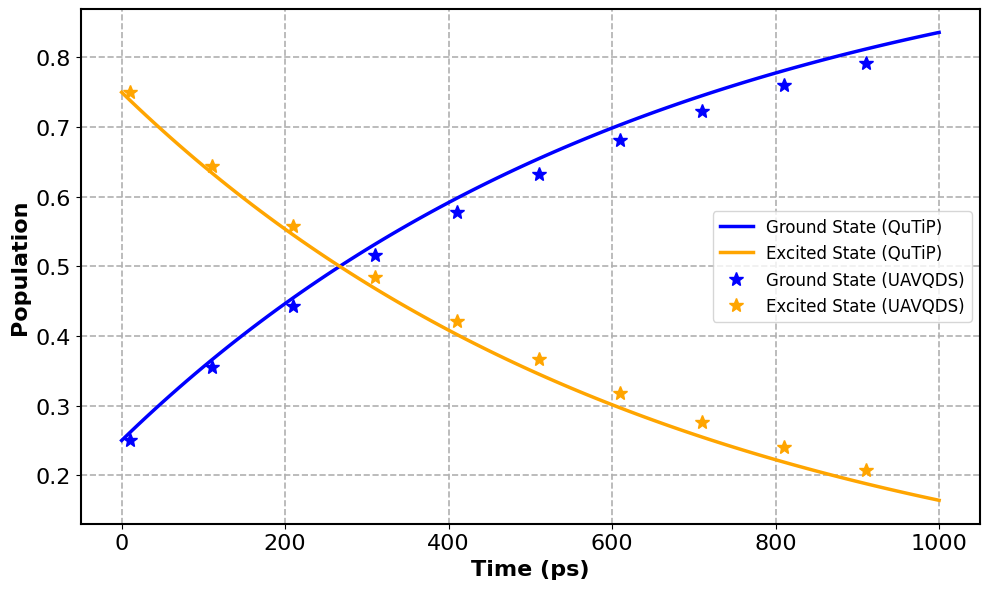

In [4]:
# Plotting results together
plt.figure(figsize=(10, 6))

# Line width and marker size
line_width = 2.5
marker_size = 10

# Define consistent colors for ground and excited states
ground_color = 'blue'
excited_color = 'orange'
uavqds_ground_color = 'blue'  # Same as QuTiP ground state
uavqds_excited_color = 'orange'  # Same as QuTiP excited state

# Plot QuTiP results
plt.plot(times * 1e12, ground_population, 
         label="Ground State (QuTiP)", 
         color=ground_color, linewidth=line_width)

plt.plot(times * 1e12, excited_population, 
         label="Excited State (QuTiP)", 
         color=excited_color, linewidth=line_width)

# Plot UAVQDS results with markers
plt.plot(times[1::10] * 1e12, ground, 
         '*', label="Ground State (UAVQDS)", 
         color=uavqds_ground_color, markersize=marker_size)

plt.plot(times[1::10] * 1e12, excited, 
         '*', label="Excited State (UAVQDS)", 
         color=uavqds_excited_color, markersize=marker_size)

# Customize plot appearance
plt.xlabel('Time (ps)', fontsize=16, fontweight='bold')
plt.ylabel('Population', fontsize=16, fontweight='bold')
# plt.title('Comparison of Ground and Excited State Populations', fontsize=16, fontweight='bold')

# Increase font size of ticks
plt.tick_params(axis='both', which='major', labelsize=16)  # Major ticks
# plt.tick_params(axis='both', which='minor', labelsize=12)  # Minor ticks, if any


# Increase font size of the legend and set it outside the plot
plt.legend(fontsize=12, loc='best')

# Make gridlines bolder
plt.grid(True, which='both', linestyle='--', linewidth=1.2)

# Increase the thickness of the plot borders
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("population_comparison.png", dpi=300)  # Save with high DPI for publication quality
plt.show()
